# Rigid-body kinematics

## Reference

The following sources helped me to refine my understanding

<a href="http://hades.mech.northwestern.edu/index.php/Modern_Robotics" target="_blank">Modern Robotics: Mechanics, Planning, and Control</a>


## Code

https://github.com/NxRLab/ModernRobotics

https://github.com/junhyeokahn/tf_rbdl

https://github.com/stack-of-tasks/pinocchio

## Analytic Inverse Kinematics

To find an analytical solution to the inverse kinematics problem in 3D we decompose the problem into two steps, first find the orientation and then use the solution we developed for the 2D case.

This is specific to the kind of robots like the minipupper.

The hip joints revolve around the x axis and the leg joints revolve around the y axis. We need to find the plane that goes through the end of the hip joint the the projection of P on the y,z plane. The figure below illustrate the situation.

We can calculate the angel $\alpha$ as

$$ \alpha = arctan2\left(P_z, P_y\right) $$

and the angle $\beta$ as

$$ \beta = arctan2\left(d, \sqrt{r^2 - d^2}\right) $$

and finally the angle $\phi$ as

$$ \phi = \frac{\pi}{2} + \alpha - \beta $$

To find the upper and lower leg angle we can no use the inverse kinematics in 2D as we have done previously

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
d = 1.3 # lenght of hip link
l = 4 # lenght of leg in projection
#d = 0.0197
#l = 0.07749896773506083
phi = np.radians(20)
points = np.zeros((2, 3))
points[0,1] = d*np.cos(phi)
points[1,1] = d*np.sin(phi)
points[0,2] = points[0,1] + l*np.cos(np.pi/2-phi)
points[1,2] = points[1,1] - l*np.sin(np.pi/2-phi)
points1 = np.zeros((2, 3))
points1[0,1] = l*np.cos(np.pi/2-phi)
points1[1,1] = -l*np.sin(np.pi/2-phi)
points1[0,2] = points1[0,1] + d*np.cos(phi)
points1[1,2] = points1[1,1] + d*np.sin(phi)
points2 = np.zeros((2, 2))
points2[0,1] = points[0,2]
points2[1,1] = points[1,2]

In [3]:
angles = np.linspace(0, float(phi))
xs = 0.5 * np.cos(angles)
ys = 0.5 * np.sin(angles)

In [4]:
alpha = np.arctan2(points[1,2], points[0,2])
r = np.sqrt(points[0,2]**2 + points[1,2]**2)
beta = np.arctan2(d, np.sqrt(r**2-d**2))

In [5]:
print("P = [%.6f, %.6f]" % (points[0,2], points[1,2]))
print("calculated value of phi: %.2f" % np.degrees(np.pi/2+alpha-beta))

P = [2.589681, -3.314144]
calculated value of phi: 20.00


In [6]:
angles1 = np.linspace(float(alpha), 0)
xs1 = 0.5 * np.cos(angles1)
ys1 = 0.5 * np.sin(angles1)

In [7]:
angles2 = np.linspace(phi-np.pi/2, float(alpha))
xs2 = 0.5 * np.cos(angles2)
ys2 = 0.5 * np.sin(angles2)

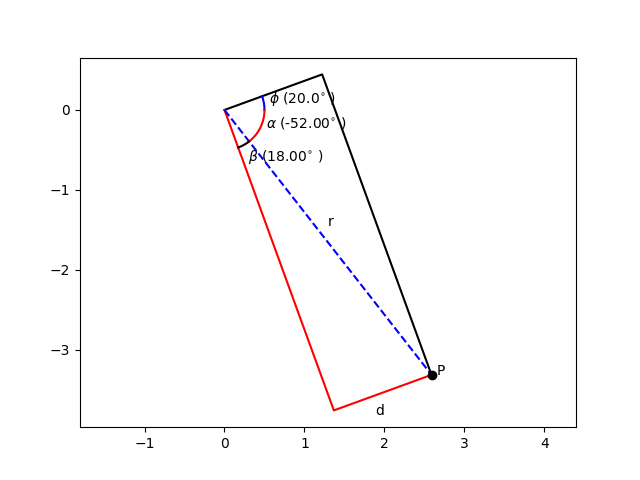

In [8]:
fig, ax = plt.subplots()
plt.xlim(-4,4) #<-- set the x axis limits
plt.ylim(-4,4) #<-- set the y axis limits
# plot hip link and leg
plt.plot(points[0], points[1],'-k')
plt.plot(points1[0], points1[1],'-r')
plt.plot(points2[0], points2[1],'--b')
# plot angle phi
plt.plot(xs, ys, '-b')
plt.text(xs[int(len(angles)/2)]+0.07, ys[int(len(angles)/2)], "$\\phi$ (%s$^{\circ}$ )" % np.degrees(phi))
# plot angle alpha
plt.plot(xs1, ys1, '-r')
plt.text(xs1[int(len(angles1)/2)]+0.07, ys1[int(len(angles1)/2)], "$\\alpha$ (%.2f$^{\circ}$ )" % np.degrees(alpha))
# plot angle beta
plt.plot(xs2, ys2, '-k')
plt.text(xs2[int(len(angles2)/2)]+0.05, ys2[int(len(angles2)/2)]-0.2, "$\\beta$ (%.2f$^{\circ}$ )" % np.degrees(beta))
plt.axis('equal')
# plot a black point at foot
plt.plot(points[0, 2], points[1,2],'ok')
plt.text(points[0, 2]+0.07, points[1, 2], "P")
plt.text(points[0, 2]-0.7, points[1, 2]-0.5, "d")
plt.text(points2[0,1]/2, points2[1,1]/2+0.2, "r")


plt.grid(visible=False, which='major')

Let's apply this to minipupper using the URDF file and the transformation manager from pytransform3d

In [9]:
import os
from pytransform3d.urdf import UrdfTransformManager

In [10]:
tm = UrdfTransformManager()
with open('../mini-pupper_description/urdf/mini-pupper.urdf', "r") as f:
    tm.load_urdf(f.read(), package_dir='../')

In [11]:
whitelist = []
leg = 'rf'
whitelist.append("%s_hip_link" % leg)
whitelist.append("%s_upper_leg_link" % leg)
whitelist.append("%s_lower_leg_link" % leg)
whitelist.append("%s_foot_link" % leg)

Text(0.5, 0, 'Z axis')

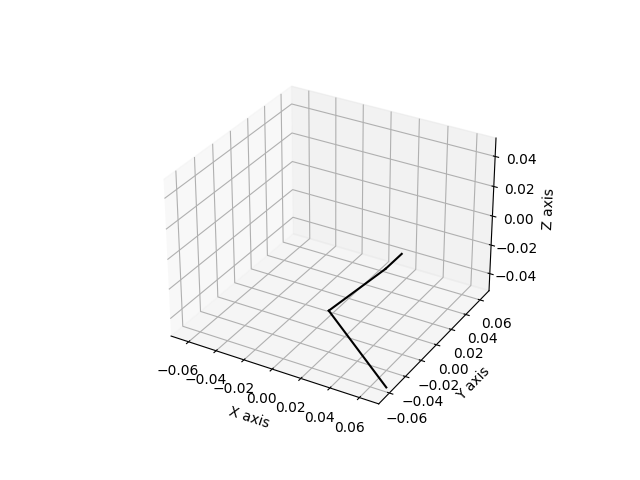

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
tm.set_joint('%s_hip_joint' % leg, np.radians(0))
tm.set_joint('%s_upper_leg_joint' % leg, np.pi/4)
tm.set_joint('%s_lower_leg_joint' % leg, -np.pi/2)
#ax = tm.plot_frames_in('mini-pupper', whitelist=whitelist, s=0.02, show_name=False, ax=ax)
ax = tm.plot_connections_in("mini-pupper", whitelist=whitelist, ax=ax)
#tm.plot_visuals("mini-pupper", ax=ax)
ax.set_xlim((-0.07, 0.07))
ax.set_ylim((-0.07, 0.07))
ax.set_zlim((-0.05, 0.05))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

In [13]:
from pytransform3d.urdf import UrdfTransformManager
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import os
from gaits3D import GaitController3D
%matplotlib widget

gc = GaitController3D()
vel_x = 0.5
vel_y = 0.5
length = 0.04
height = 0.02
angle = np.arctan2(vel_y, vel_x)
gc.step_length = length
gc.step_height = height
trajectory = gc._gait_plan(angle, 'walk', 0.5)

In [14]:
import socket
from hrst_sender import SocketSender
HOST = '192.168.1.104'
command = 'Walk 1./120|0.04|0.02|20|0.5|0.5'
sender = SocketSender(HOST)
sender.send_pushup_command(command)

Connected to server 192.168.1.104:8001
Connection closed


In [15]:
tm = UrdfTransformManager()
with open('../mini-pupper_description/urdf/mini-pupper.urdf', "r") as f:
    tm.load_urdf(f.read(), package_dir='../')

In [16]:
whitelist = []
leg = 'rf'
whitelist.append("%s_hip_link" % leg)
whitelist.append("%s_upper_leg_link" % leg)
whitelist.append("%s_lower_leg_link" % leg)
whitelist.append("%s_foot_link" % leg)

In [17]:
joint_angles_list = trajectory[0]
history_len = len(joint_angles_list)
history_x, history_y, history_z = deque(maxlen=history_len), deque(maxlen=history_len), deque(maxlen=history_len)

[ 0.07840727 -0.06189723 -0.05699936]


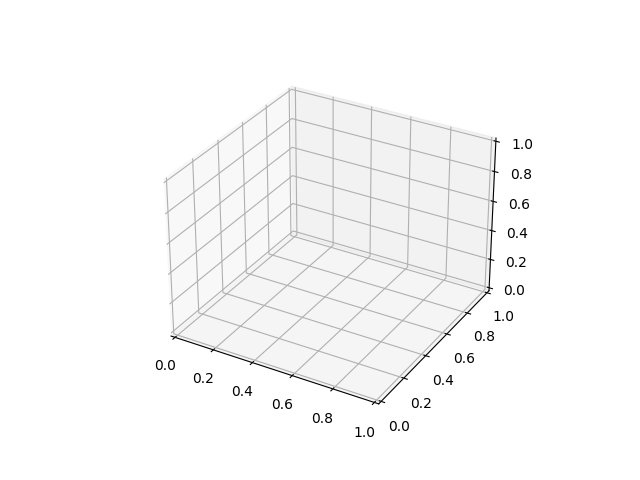

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
coordinate = []
for i in range(len(joint_angles_list)):
    hip_angle, upper_leg_angle, lower_leg_angle = joint_angles_list[i]
    
    tm.set_joint('%s_hip_joint' % leg, hip_angle)
    tm.set_joint('%s_upper_leg_joint' % leg, upper_leg_angle)
    tm.set_joint('%s_lower_leg_joint' % leg, lower_leg_angle)
    coordinate.append(tm.get_transform('%s_foot_link' % leg, 'base_link')[:3, 3:4].reshape(3))
print(coordinate[2])
def update1(frame):
    hip_angle, upper_leg_angle, lower_leg_angle = joint_angles_list[frame]
    
    # 设置关节角度,获取末端坐标
    tm.set_joint('%s_hip_joint' % leg, hip_angle)
    tm.set_joint('%s_upper_leg_joint' % leg, upper_leg_angle)
    tm.set_joint('%s_lower_leg_joint' % leg, lower_leg_angle) 
    
    ax.cla()

    history_x.append(coordinate[frame][0])
    history_y.append(coordinate[frame][1])
    history_z.append(coordinate[frame][2])

    if frame == 0:
        history_x.clear()
        history_y.clear()
        history_z.clear()
    
    ax.plot(history_x, history_y, history_z,'.-', lw=1, ms=2, color='r')

    #绘制机器人
    tm.plot_frames_in("mini-pupper", whitelist=whitelist, s=0.02, show_name=False, ax=ax)
    tm.plot_connections_in("mini-pupper", whitelist=whitelist, ax=ax) 
    
    # 设置轴范围和标签
    ax.set_xlim((-0.1, 0.1))
    ax.set_ylim((-0.07, 0.07))
    ax.set_zlim((-0.06, 0.05))
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
def update2(frame):
    history_x.append(coordinate[frame][0])
    history_y.append(coordinate[frame][1])
    history_z.append(coordinate[frame][2])

    if frame == 0:
        history_x.clear()
        history_y.clear()
        history_z.clear()
    
    #ax.cla()
    ax.plot(history_x, history_y, history_z,'.-', lw=1, ms=2, color='r')

    ax.set_xlim((-0.1, 0.1))
    ax.set_ylim((-0.07, 0.07))
    ax.set_zlim((-0.06, 0.05))
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

ani1 = FuncAnimation(fig, update1, frames=len(joint_angles_list), interval=1)
ani2 = FuncAnimation(fig, update2, frames=len(joint_angles_list), interval=1)
plt.show()

In [18]:
points = np.zeros((3, 4))
points[:,0] = tm.get_transform('%s_hip_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,1] = tm.get_transform('%s_upper_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,2] = tm.get_transform('%s_lower_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,3] = tm.get_transform('%s_foot_link' % leg, 'base_link')[:3, 3:4].reshape(3)

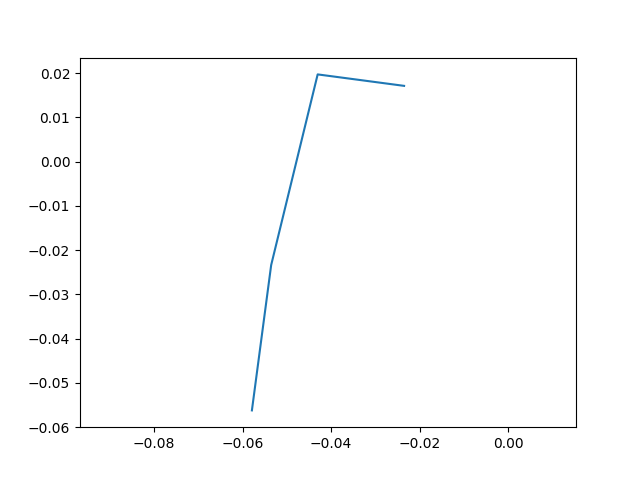

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(points[1], points[2])
plt.axis('equal')

plt.grid(visible=False, which='major')

### Observation

The upper and lower leg are not aligned in the plane as I would expect. Let's try to fix the urdf file

In [20]:
tm = UrdfTransformManager()
with open('../mini-pupper_description/urdf/mini-pupper_fixed.urdf', "r") as f:
    tm.load_urdf(f.read(), package_dir='../')
if 'l' in leg:
    orientation = 1
else:
    orientation = -1
tm.set_joint('%s_hip_joint' % leg, np.radians(orientation * 20))
tm.set_joint('%s_upper_leg_joint' % leg, np.pi/4)
tm.set_joint('%s_lower_leg_joint' % leg, -np.pi/4)

In [21]:
# points in base_link frame
points = np.zeros((3, 4))
points[:,0] = tm.get_transform('%s_hip_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,1] = tm.get_transform('%s_upper_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,2] = tm.get_transform('%s_lower_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
points[:,3] = tm.get_transform('%s_foot_link' % leg, 'base_link')[:3, 3:4].reshape(3)

In [22]:
# points relative to hip
points1 = np.zeros((3, 4))
points1[:,0] = points[:,0] - points[:,0]
points1[:,1] = points[:,1] - points[:,0]
points1[:,2] = points[:,2] - points[:,0]
points1[:,3] = points[:,3] - points[:,0]

In [23]:
d = np.linalg.norm(points1[1:,1])
r= np.linalg.norm(points1[1:,3])
print(d)
print(r)
alpha = np.arctan2(points1[2,3], points1[1,3])
beta = np.arctan2(d, np.sqrt(r**2-d**2))
if 'r' in leg:
    beta = -beta
print(np.degrees(alpha))
print(np.degrees(beta))
print("calculated value of phi: %.2f" % np.degrees(np.pi/2+alpha-beta))

0.0197
0.093455272588788
-122.16900542679402
-12.169005426794019
calculated value of phi: -20.00


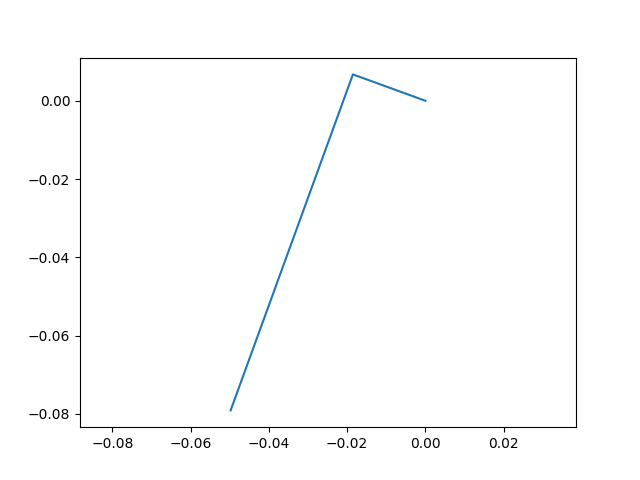

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(points1[1], points1[2])
plt.axis('equal')

plt.grid(visible=False, which='major')

In [25]:
from gaits3D import GaitController3D
gc = GaitController3D()

In [26]:
angles = gc.mpInverseKin(leg, points[:,3])

In [27]:
np.degrees(angles[0])

-20.000000000000004

In [28]:
np.degrees(angles[1])

44.99999999941885

In [29]:
np.degrees(angles[2])

-44.99999999890996

## Numerical Inverse Kinematics

## Robot Orientation

In [30]:
tm = UrdfTransformManager()
with open('../mini-pupper_description/urdf/mini-pupper_fixed.urdf', "r") as f:
    tm.load_urdf(f.read(), package_dir='../')

In [31]:
# Neutral position
legs = ['rf', 'lf', 'rh', 'lh']
servos = ['hip', 'upper_leg', 'lower_leg']
for leg in legs:
    for servo in servos:
        if 'hip' in servo:
            angle = 0.0
        if 'upper' in servo:
            angle = np.pi/4
        if 'lower' in servo:
            angle = -np.pi/2
        tm.set_joint('%s_%s_joint' % (leg, servo), angle)

Text(0.5, 0, 'Z axis')

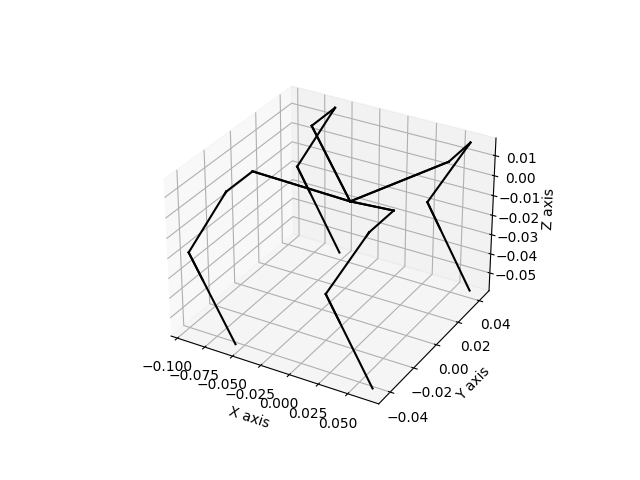

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = tm.plot_connections_in("mini-pupper", ax=ax)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

In [33]:
wireframe = np.zeros((4, 3, 5))
legs = ['rf', 'lf', 'rh', 'lh']
for i in range(len(legs)):
    leg = legs[i]
    wireframe[i,:,1] = tm.get_transform('%s_hip_link' % leg, 'base_link')[:3, 3:4].reshape(3)
    wireframe[i,:,2] = tm.get_transform('%s_upper_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
    wireframe[i,:,3] = tm.get_transform('%s_lower_leg_link' % leg, 'base_link')[:3, 3:4].reshape(3)
    wireframe[i,:,4] = tm.get_transform('%s_foot_link' % leg, 'base_link')[:3, 3:4].reshape(3)

In [34]:
# ref: https://stackoverflow.com/questions/6802577/rotation-of-3d-vector
# using the Euler–Rodrigues formula https://en.wikipedia.org/wiki/Euler–Rodrigues_formula
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

### Height

Move up or down by subtracting or adding height to the z coordinate of the foot positions

### Pitch

Rotation around the Y axis by angle $\alpha$

In [35]:
axis = [0, 1, 0]
alpha = np.radians(-10)
wireframe_rot_rf = np.dot(rotation_matrix(axis, alpha), wireframe[0])
wireframe_rot_rh = np.dot(rotation_matrix(axis, alpha), wireframe[2])

Text(0.5, 1.0, 'Side View')

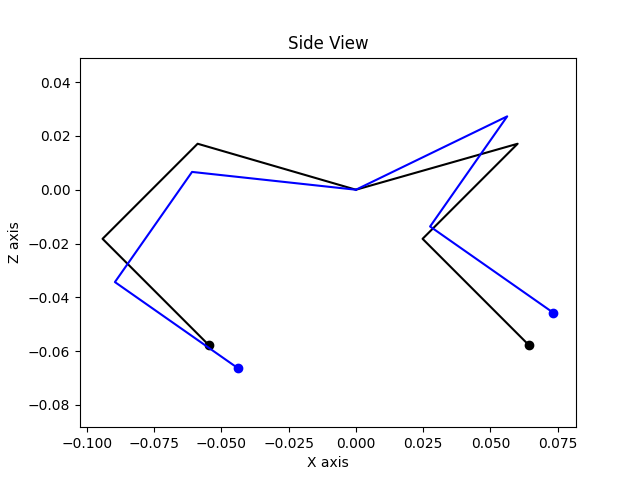

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wireframe[0][0], wireframe[0][2], color='k')
ax.plot(wireframe[2][0], wireframe[2][2], color='k')
ax.plot(wireframe[0][0][4], wireframe[0][2][4], 'ko')
ax.plot(wireframe[2][0][4], wireframe[2][2][4], 'ko')

ax.plot(wireframe_rot_rf[0], wireframe_rot_rf[2], color='b')
ax.plot(wireframe_rot_rh[0], wireframe_rot_rh[2], color='b')
ax.plot(wireframe_rot_rf[0][4], wireframe_rot_rf[2][4], 'bo')
ax.plot(wireframe_rot_rh[0][4], wireframe_rot_rh[2][4], 'bo')

plt.axis('equal')
ax.set_xlabel('X axis')
ax.set_ylabel('Z axis')

plt.grid(visible=False, which='major')
plt.title('Side View')

### Roll

Rotation around the X axis by angle $\alpha$

In [37]:
axis = [1, 0, 0]
alpha = np.radians(10)
wireframe_rot_rf = np.dot(rotation_matrix(axis, alpha), wireframe[0])
wireframe_rot_lf = np.dot(rotation_matrix(axis, alpha), wireframe[1])

In [38]:
print(np.transpose(wireframe[0])[4])
print(np.transpose(wireframe_rot_rf)[4])
print(gc.mpInverseKin('rf', np.transpose(wireframe_rot_rf)[4]))

[ 0.06438264 -0.0432     -0.05785332]
[ 0.06438264 -0.03249757 -0.064476  ]
[0.13255113886842565, 0.7164885251500537, -1.440155432715426]


Text(0.5, 1.0, 'Front View')

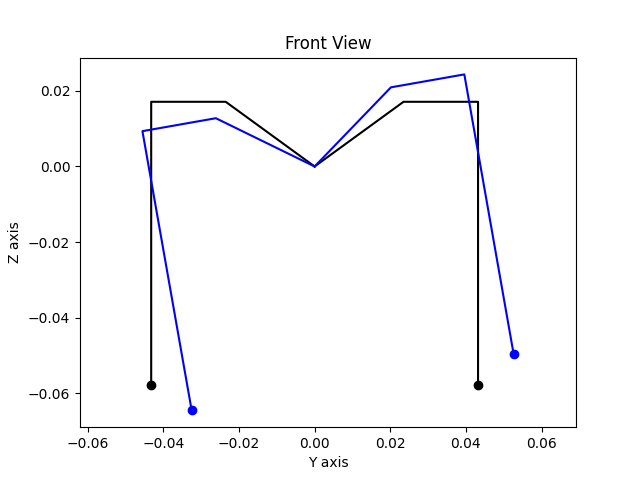

In [39]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wireframe[0][1], wireframe[0][2], color='k')
ax.plot(wireframe[1][1], wireframe[1][2], color='k')
ax.plot(wireframe[0][1][4], wireframe[0][2][4], 'ko')
ax.plot(wireframe[1][1][4], wireframe[1][2][4], 'ko')
ax.plot(wireframe_rot_rf[1], wireframe_rot_rf[2], color='b')
ax.plot(wireframe_rot_lf[1], wireframe_rot_lf[2], color='b')
ax.plot(wireframe_rot_rf[1][4], wireframe_rot_rf[2][4], 'bo')
ax.plot(wireframe_rot_lf[1][4], wireframe_rot_lf[2][4], 'bo')

plt.axis('equal')
ax.set_xlabel('Y axis')
ax.set_ylabel('Z axis')
plt.grid(visible=False, which='major')
plt.title('Front View')

### Yaw

Rotation around the Z axis by angle $\alpha$

In [40]:
axis = [0, 0, 1]
alpha = np.radians(10)
wireframe_rot_rf = np.dot(rotation_matrix(axis, alpha), wireframe[0])
wireframe_rot_lf = np.dot(rotation_matrix(axis, alpha), wireframe[1])
wireframe_rot_rh = np.dot(rotation_matrix(axis, alpha), wireframe[2])
wireframe_rot_lh = np.dot(rotation_matrix(axis, alpha), wireframe[3])

Text(0.5, 1.0, 'Top View')

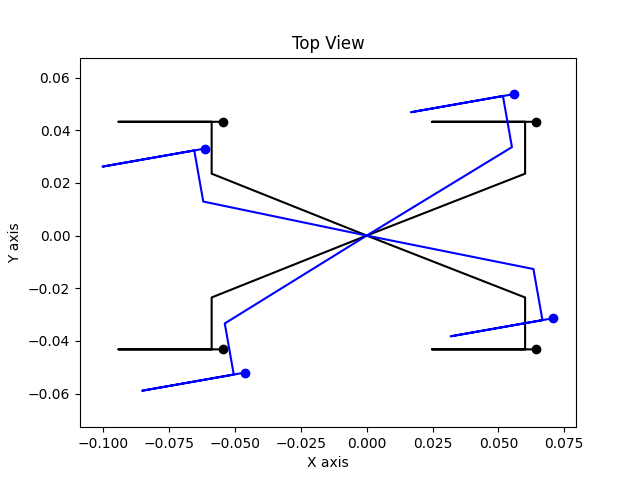

In [41]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(wireframe[0][0], wireframe[0][1], color='k')
ax.plot(wireframe[1][0], wireframe[1][1], color='k')
ax.plot(wireframe[2][0], wireframe[2][1], color='k')
ax.plot(wireframe[3][0], wireframe[3][1], color='k')
ax.plot(wireframe[0][0][4], wireframe[0][1][4], 'ko')
ax.plot(wireframe[1][0][4], wireframe[1][1][4], 'ko')
ax.plot(wireframe[2][0][4], wireframe[2][1][4], 'ko')
ax.plot(wireframe[3][0][4], wireframe[3][1][4], 'ko')

ax.plot(wireframe_rot_rf[0], wireframe_rot_rf[1], color='b')
ax.plot(wireframe_rot_lf[0], wireframe_rot_lf[1], color='b')
ax.plot(wireframe_rot_rh[0], wireframe_rot_rh[1], color='b')
ax.plot(wireframe_rot_lh[0], wireframe_rot_lh[1], color='b')
ax.plot(wireframe_rot_rf[0][4], wireframe_rot_rf[1][4], 'bo')
ax.plot(wireframe_rot_lf[0][4], wireframe_rot_lf[1][4], 'bo')
ax.plot(wireframe_rot_rh[0][4], wireframe_rot_rh[1][4], 'bo')
ax.plot(wireframe_rot_lh[0][4], wireframe_rot_lh[1][4], 'bo')

plt.axis('equal')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.grid(visible=False, which='major')
plt.title('Top View')

In [42]:
lp = gc.getRPYH(0, 0, 0, 0.01)
for i in range(len(gc.legs)):
    for j in range(len(gc.joints)):
        fn = "%s_%s" % (gc.legs[i], gc.joints[j])
        with open("../controller/servos/rpy/%s" % fn, "w") as f:
            if 'hip' in fn:
                f.write("%.10f\n" % lp[i][j])
            if 'upper' in fn:
                f.write("%.10f\n" % (float(lp[i][j])-np.pi))
            if 'lower' in fn:
                f.write("%.10f\n" % -lp[i][j])